In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('../data/data.csv', sep=';', header=0, low_memory=False, na_values =["", " "])
cols = df.columns
mask = df["income"].isnull()
df = df[~mask].copy()

In [97]:
mask= df["income"].isin([50,90,99])
filtered_df = df[~mask].copy()

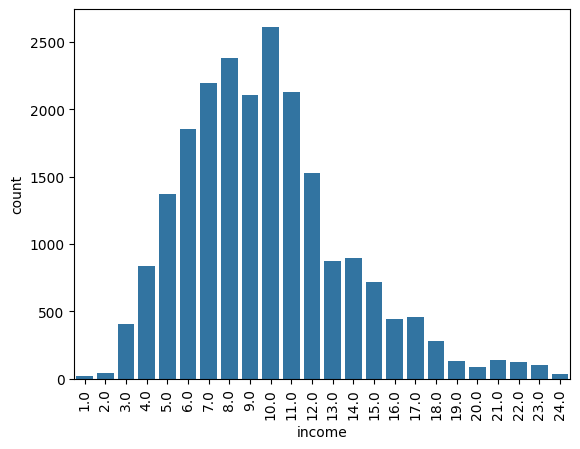

In [98]:
sns.countplot(
    data = filtered_df,
    x="income"
)
plt.tick_params(axis="x", rotation=90 )

To improve the results and provide more meaningful insights, I want to consolidate the income classes into 3 to 5 broader categories, such as "low," "medium," and "high."

# 1. 1D K-Means Clustering

In [99]:
from sklearn.cluster import KMeans

In [100]:
income_df = filtered_df["income"].copy()
income_classes = np.arange(1,25).reshape(-1, 1)
counts = income_df.value_counts().sort_index()

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(income_classes,sample_weight=counts)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_.flatten()

income_to_cluster = {cls:cluster for cls, cluster in zip(income_classes.flatten(),labels)}


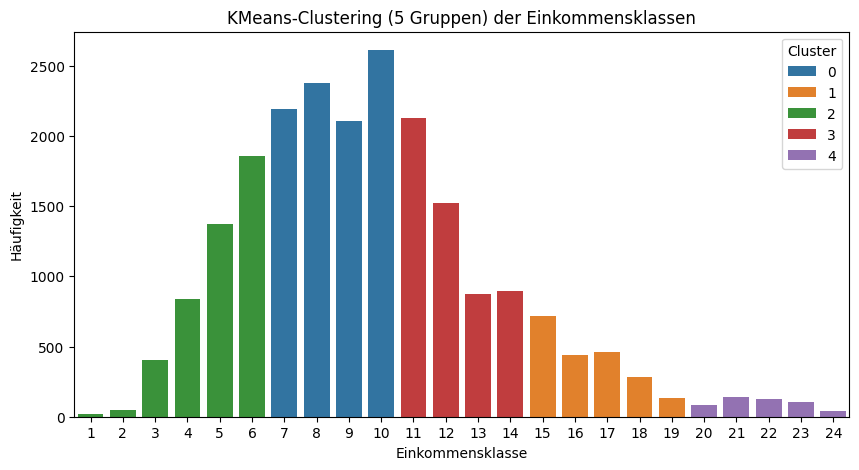

In [101]:
plt.figure(figsize=(10, 5))
sns.barplot(x=income_classes.flatten(), y=counts, hue=labels, dodge=False, palette='tab10')
plt.xlabel('Einkommensklasse')
plt.ylabel('Häufigkeit')
plt.title(f'KMeans-Clustering ({n_clusters} Gruppen) der Einkommensklassen')
plt.legend(title='Cluster')
plt.show()

In [102]:
income_classes = np.arange(1,25)
income_to_cluster = dict(zip(income_classes, labels))
filtered_df["income_kmeans_cluster"] = filtered_df["income"].map(income_to_cluster)

cluster_to_label = {
    1: "high",
    2: "lowest",
    0: "lower middle",
    3: "middle",
    4: "highest"
}
filtered_df["income_kmeans_cluster"] = filtered_df["income_kmeans_cluster"].map(cluster_to_label)

Safe transformed data

In [103]:
from pathlib import Path
base_path = Path.cwd().parent
filtered_df.to_csv(base_path/"data"/"kmeans_clustered_data.csv", sep = ";", index = False)